In [544]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [545]:
brunson_data = pd.read_csv("../data/jalen_brunson.csv")

brunson_data.shape

(83, 34)

In [546]:
#Drop the rows for columns that have  values "inactive" or "did not dress".

inactive = brunson_data['2P'] == "Inactive"
no_dress = brunson_data['2P'] == "Did Not Dress"

brunson_data_cleaned = brunson_data.drop(brunson_data[inactive | no_dress].index)

print(brunson_data_cleaned.shape)
brunson_data_cleaned.tail(5)

(66, 34)


,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
77,62.0,484.0,78.0,2025-04-06,NYK,NaN,PHO,W 112-98,1,34:27,...,2,2,6,1,0,3,2,15,11.1,9
78,63.0,485.0,79.0,2025-04-08,NYK,NaN,BOS,L 117-119 (OT),1,38:26,...,1,1,10,0,0,2,1,27,21.2,-2
79,64.0,486.0,80.0,2025-04-10,NYK,@,DET,L 106-115,1,29:17,...,0,2,5,0,2,3,2,15,7.8,-11
80,65.0,487.0,81.0,2025-04-11,NYK,NaN,CLE,L 102-108,1,36:17,...,1,1,2,1,0,3,1,27,17.6,-6
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-25,65,2301,...,160,187,475,60,8,164,138,1690,20.0,146


In [547]:
# Remove the last row that sums up all the statistics 

brunson_data_cleaned2 = brunson_data_cleaned.iloc[:-1 , :]

print(brunson_data_cleaned2.shape)

brunson_data_cleaned2.tail(5)


(65, 34)


,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
61,61.0,483.0,62.0,2025-03-06,NYK,@,LAL,L 109-113 (OT),1,41:11,...,4,4,10,0,0,3,2,39,30.0,-8
77,62.0,484.0,78.0,2025-04-06,NYK,NaN,PHO,W 112-98,1,34:27,...,2,2,6,1,0,3,2,15,11.1,9
78,63.0,485.0,79.0,2025-04-08,NYK,NaN,BOS,L 117-119 (OT),1,38:26,...,1,1,10,0,0,2,1,27,21.2,-2
79,64.0,486.0,80.0,2025-04-10,NYK,@,DET,L 106-115,1,29:17,...,0,2,5,0,2,3,2,15,7.8,-11
80,65.0,487.0,81.0,2025-04-11,NYK,NaN,CLE,L 102-108,1,36:17,...,1,1,2,1,0,3,1,27,17.6,-6


In [548]:
brunson_data_cleaned2.dtypes

Rk            float64
Gcar          float64
Gtm           float64
Date           object
Team           object
Unnamed: 5     object
Opp            object
Result         object
GS             object
MP             object
FG             object
FGA            object
FG%            object
3P             object
3PA            object
3P%            object
2P             object
2PA            object
2P%            object
eFG%           object
FT             object
FTA            object
FT%            object
ORB            object
DRB            object
TRB            object
AST            object
STL            object
BLK            object
TOV            object
PF             object
PTS            object
GmSc           object
+/-            object
dtype: object

In [549]:
#convert specific column data types to int so data can be summarized

brunson_data_cleaned2['FG'] = brunson_data_cleaned2['FG'].astype(int)
brunson_data_cleaned2['FGA'] = brunson_data_cleaned2['FGA'].astype(int)
brunson_data_cleaned2['FG%'] = brunson_data_cleaned2['FG%'].astype(float)
brunson_data_cleaned2['FT'] = brunson_data_cleaned2['FT'].astype(int)
brunson_data_cleaned2['GmSc'] = brunson_data_cleaned2['GmSc'].astype(float)

brunson_data_cleaned2.describe()


/var/folders/wx/n3nghw29261195fbm316p8xm0000gn/T/ipykernel_93044/1817516926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['FG'] = brunson_data_cleaned2['FG'].astype(int)
/var/folders/wx/n3nghw29261195fbm316p8xm0000gn/T/ipykernel_93044/1817516926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['FGA'] = brunson_data_cleaned2['FGA'].astype(int)
/var/folders/wx/n3nghw29261195fbm316p8xm0000gn/T/ipykernel_93044/1817516926.py:5: SettingWithCopyWarning: 
A value

,Rk,Gcar,Gtm,FG,FGA,FG%,FT,GmSc
count,65.00000,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,33.00000,455.00000,34.415385,9.000000,18.461538,0.483846,5.661538,19.966154
std,18.90767,18.90767,21.109012,3.177066,4.444368,0.115662,3.679661,8.869440
min,1.00000,423.00000,1.000000,3.000000,8.000000,0.214000,0.000000,2.400000
25%,17.00000,439.00000,17.000000,7.000000,15.000000,0.385000,3.000000,13.000000
50%,33.00000,455.00000,33.000000,9.000000,18.000000,0.500000,5.000000,18.900000
75%,49.00000,471.00000,50.000000,11.000000,21.000000,0.571000,7.000000,27.700000
max,65.00000,487.00000,81.000000,18.000000,31.000000,0.750000,16.000000,43.900000


In [550]:
#Split the column "result" into two new columns "outcome" and "score"
brunson_data_cleaned2[["Outcome", "Score"]] = brunson_data_cleaned2['Result'].str.split(' ', n=1, expand=True)

brunson_data_cleaned2

/var/folders/wx/n3nghw29261195fbm316p8xm0000gn/T/ipykernel_93044/3626224486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2[["Outcome", "Score"]] = brunson_data_cleaned2['Result'].str.split(' ', n=1, expand=True)
/var/folders/wx/n3nghw29261195fbm316p8xm0000gn/T/ipykernel_93044/3626224486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2[["Outcome", "Score"]] = brunson_data_cleaned2['Result'].str.split(' ', n=1, expand=True)


,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Outcome,Score
0,1.0,423.0,1.0,2024-10-22,NYK,@,BOS,L 109-132,1,24:30,...,2,0,0,4,3,22,12.3,-23,L,109-132
1,2.0,424.0,2.0,2024-10-25,NYK,NaN,IND,W 123-98,1,29:55,...,5,0,0,1,1,26,20.7,36,W,123-98
2,3.0,425.0,3.0,2024-10-28,NYK,NaN,CLE,L 104-110,1,37:36,...,7,0,0,1,2,21,10.6,0,L,104-110
3,4.0,426.0,4.0,2024-10-30,NYK,@,MIA,W 116-107,1,36:22,...,9,0,0,1,0,22,17.3,5,W,116-107
4,5.0,427.0,5.0,2024-11-01,NYK,@,DET,W 128-98,1,30:40,...,5,2,0,2,2,36,28.4,23,W,128-98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61.0,483.0,62.0,2025-03-06,NYK,@,LAL,L 109-113 (OT),1,41:11,...,10,0,0,3,2,39,30.0,-8,L,109-113 (OT)
77,62.0,484.0,78.0,2025-04-06,NYK,NaN,PHO,W 112-98,1,34:27,...,6,1,0,3,2,15,11.1,9,W,112-98
78,63.0,485.0,79.0,2025-04-08,NYK,NaN,BOS,L 117-119 (OT),1,38:26,...,10,0,0,2,1,27,21.2,-2,L,117-119 (OT)
79,64.0,486.0,80.0,2025-04-10,NYK,@,DET,L 106-115,1,29:17,...,5,0,2,3,2,15,7.8,-11,L,106-115


Text(0.5, 0, 'Field Goals Made')

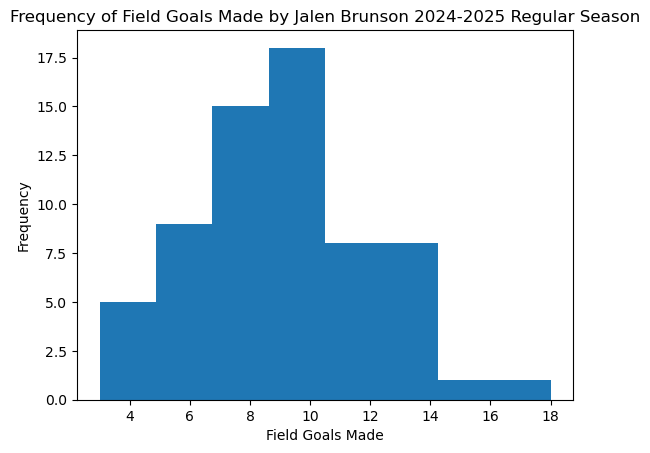

In [551]:
brunson_data_cleaned2["FG"].plot.hist(bins=8)

plt.title("Frequency of Field Goals Made by Jalen Brunson 2024-2025 Regular Season")
plt.xlabel("Field Goals Made")


Text(0.5, 0, 'Field Goals Attempted')

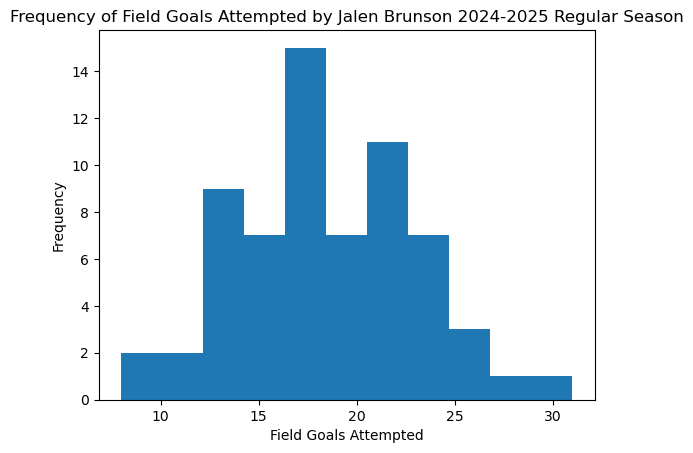

In [552]:
brunson_data_cleaned2["FGA"].plot.hist(bins=11)

plt.title("Frequency of Field Goals Attempted by Jalen Brunson 2024-2025 Regular Season")
plt.xlabel("Field Goals Attempted")

Text(0.5, 0, 'Free Throws Made')

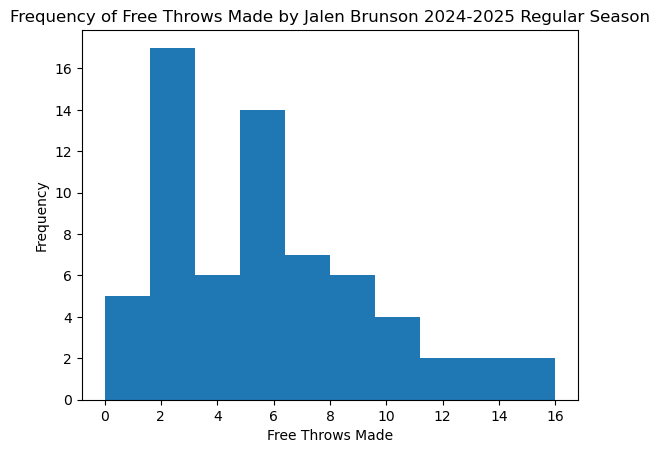

In [553]:
brunson_data_cleaned2["FT"].plot.hist(bins=10)

plt.title("Frequency of Free Throws Made by Jalen Brunson 2024-2025 Regular Season")
plt.xlabel("Free Throws Made")

In [554]:
# field pointers made grouped by outcome of the game
brunson_data_cleaned2.groupby("Outcome")[["FG"]].describe()

FG                                            
        count   mean       std  min  25%  50%   75%   max
Outcome                                                  
L        25.0  9.200  2.121320  5.0  8.0  9.0  10.0  14.0
W        40.0  8.875  3.708531  3.0  6.0  8.0  12.0  18.0

<Axes: xlabel='Outcome', ylabel='FG'>

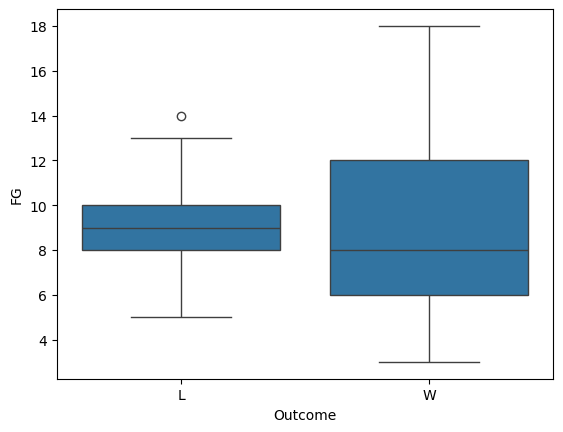

In [555]:
sns.boxplot(data=brunson_data_cleaned2, x='Outcome', y='FG')

The average of Brunson's field goals made is 9.2 in losses and a 8.875 in wins. This suggests that the number of field goals Brunson makes doesn't necessarily correlate with the Knicks winning. The boxplot grouped by game outcome shows that the interquartile range for wins is wider (6-12) compared to losses (8 - 10) which may indicate that the Knicks are able to win even when Brunson makes fewer field goals. 

In [556]:
# field pointers attempted grouped by outcome of the game
brunson_data_cleaned2.groupby("Outcome")[["FG%"]].describe()

FG%                                                           
        count     mean       std    min      25%     50%      75%    max
Outcome                                                                 
L        25.0  0.47448  0.098365  0.333  0.39100  0.4740  0.52900  0.667
W        40.0  0.48970  0.126125  0.214  0.37675  0.5195  0.58575  0.750

<Axes: xlabel='Outcome', ylabel='FG%'>

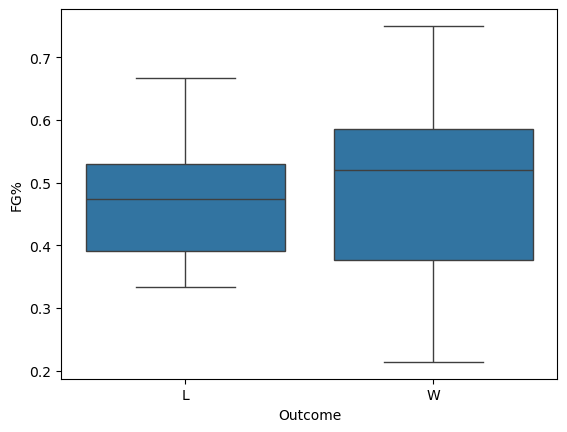

In [557]:
sns.boxplot(data=brunson_data_cleaned2, x='Outcome', y='FG%')

The average of Brunson's field goal percent is a 48.9% in wins and a 47.4% in losses. This suggests that Brunson's shooting efficiency doesn't strongly correlate with the Knicks winning. The boxplot grouped by game outcome shows there is a wider spread in wins (37% - 58%) compared to losses (39% - 53%) in the field goal percentage which may indicate that the Knicks are able to win even when Brunson is missing his shots.

In [558]:
brunson_data_cleaned2.groupby("Outcome")[["GmSc"]].describe()

GmSc                                                  
        count    mean       std  min     25%   50%    75%   max
Outcome                                                        
L        25.0  18.328  7.446896  4.9  12.300  17.6  22.90  31.7
W        40.0  20.990  9.600636  2.4  13.375  21.1  28.05  43.9

<Axes: xlabel='Outcome', ylabel='GmSc'>

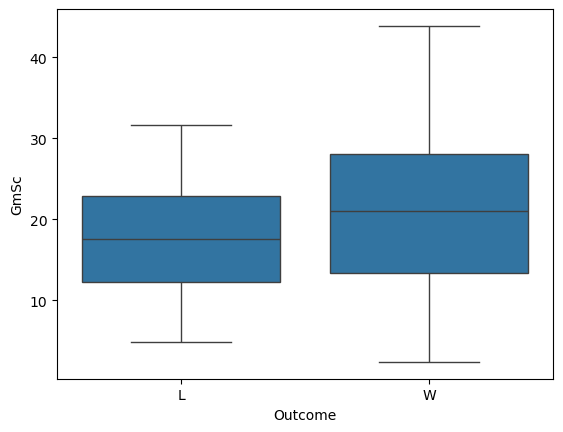

In [559]:
sns.boxplot(data=brunson_data_cleaned2, x='Outcome', y='GmSc')

The average of Brunson's game score is a 21 in wins compared to 18 in losses. This suggests that Brunson's overall estimated contribution is generally higher in the games where the Knicks win. The interquartile range for wins (13.3-28) is also slightly higher than for losses (12.3-22.9) which may indicate that when he performs well overall, the Knicks tend to win.  

Although Brunson's shooting performance doesn't show a strong correlation with winning, his overall performance (game score) which includes other stats like assists, rebounds, steals etc. tends to be higher in the games where the Knicks win. The Knicks can win even when he's less consistent in scoring but may still rely on his overall performance. 